In [3]:
from subprocess import call
import os,sys, importlib
import numpy as np 
import json
import argparse
import pathlib
import pandas as pd
import numpy as np
import io
import scipy as sp
import scipy.stats
import scipy.fftpack
import scipy.io as sio
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from itertools import product
import glob
import re

#importlib.reload(sys.modules['plot_func'])
import plot_func as pf

## Description

$x(\xi)=\xi_0 + \Delta_0 i e^{R(i-1)}$

$\dfrac{\partial x}{\partial \xi} = \Delta_0(iR + 1)e^{R(i-1)}$

$R = \dfrac{-ln \big[ (N-1)\Delta_0/H \big]}{N-2}$

$i = \dfrac{\xi-\xi_0}{\Delta_{\xi}}$ or is simply the cell index

## Calculate and Plot

In [29]:
dz = 0.2
prob_lo = -5
prob_hi = 15
H = prob_hi - prob_lo

delta0 = 0.01

z_const = np.arange(prob_lo-dz, prob_hi+dz, dz)

N = H/dz
R = -np.log(((N-1)*delta0/H))/(N-2)
i = (z_const-prob_lo)/dz

z_map = prob_lo + delta0*i*np.exp(R*(i-1))

print(i)

[ -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.
  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.
  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.
  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.
  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.
  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.
  97.  98.  99. 100.]


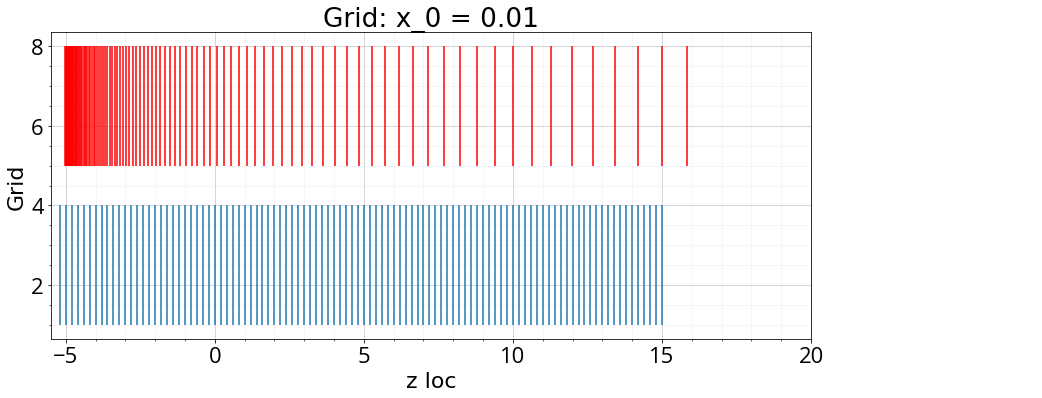

In [30]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.vlines(z_const, 1,4)
ax.vlines(z_map, 5,8, color='red')
    
ax.set_ylabel("Grid")
ax.set_xlabel("z loc")
ax.set_title("Grid: x_0 = " + str(np.round(delta0,3)))

ax.set_xlim([-5.5,20])

pf.showplotone(fig,ax,1.23,22)

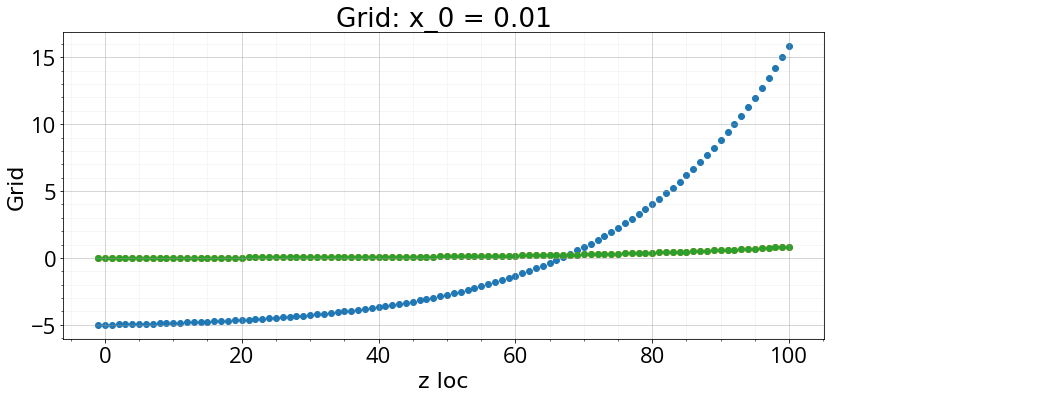

In [38]:
fig, ax = plt.subplots(1,1,figsize=(12,6))


z_map_grad = (delta0)*(i*R+1)*np.exp(R*(i-1))
numerical_grad = np.gradient(z_map)

ax.scatter(i,z_map)
ax.scatter(i,z_map_grad)
ax.scatter(i,numerical_grad)
    
ax.set_ylabel("Grid")
ax.set_xlabel("z loc")
ax.set_title("Grid: x_0 = " + str(np.round(delta0,3)))

#ax.set_xlim([90,100])

pf.showplotone(fig,ax,1.23,22)